In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [119]:
df=pd.read_csv(r"C:\Users\Kunj\Downloads\tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [121]:
df.shape

(244, 7)

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

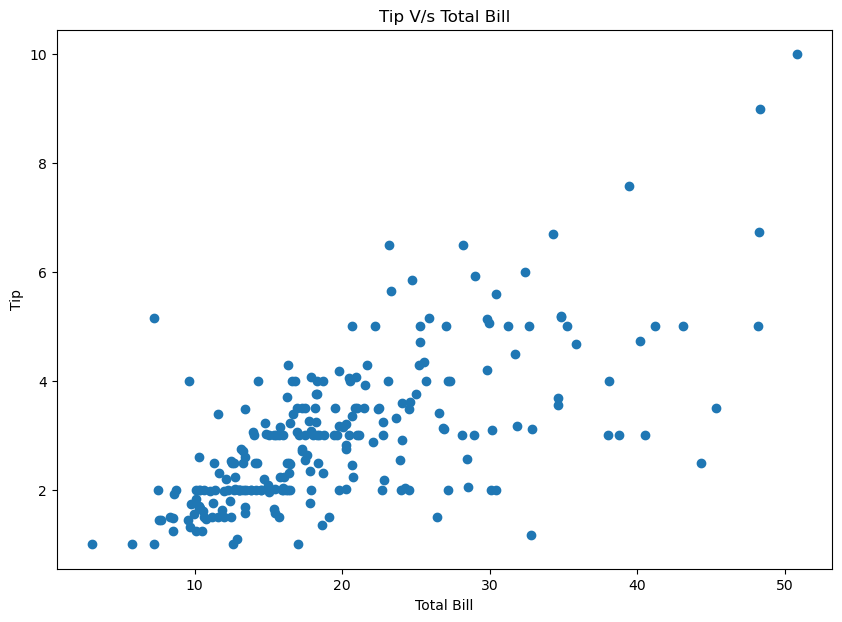

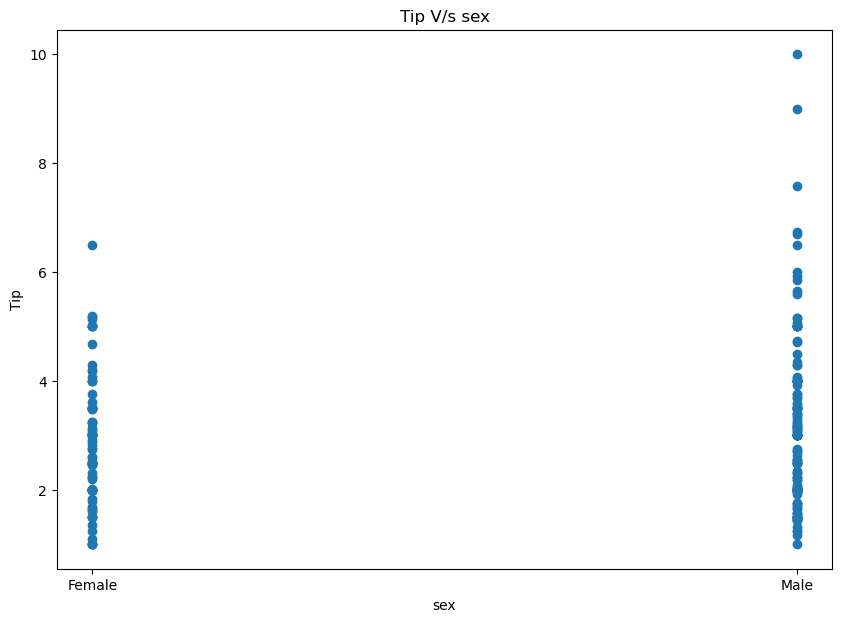

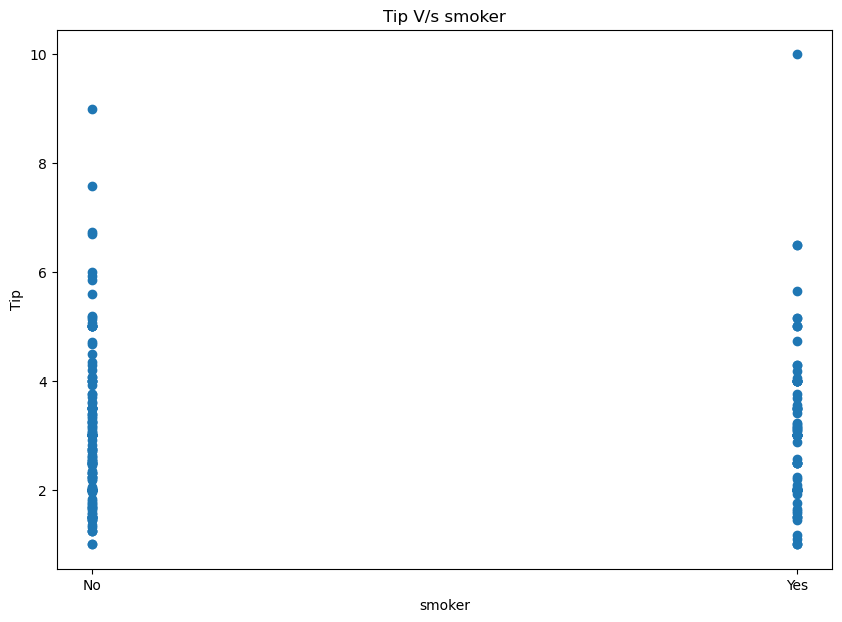

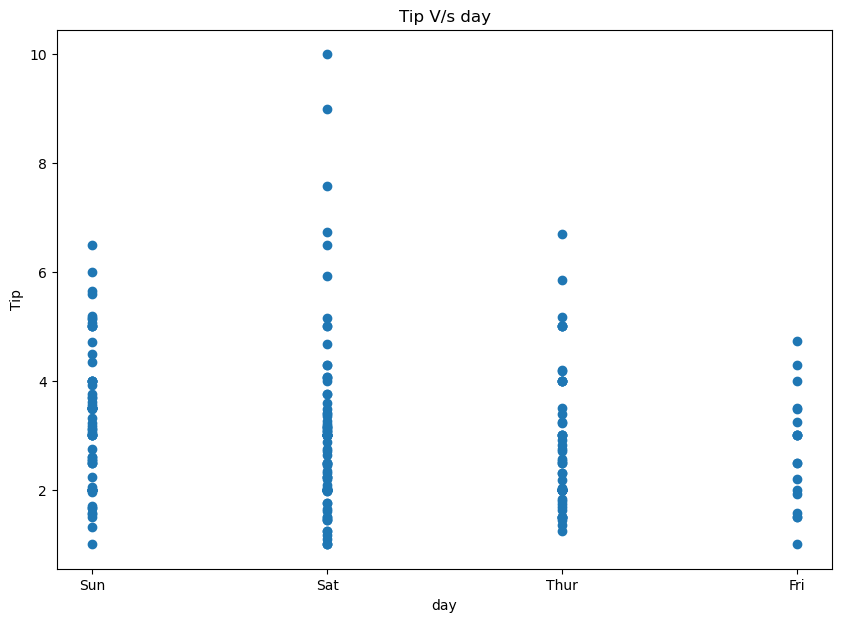

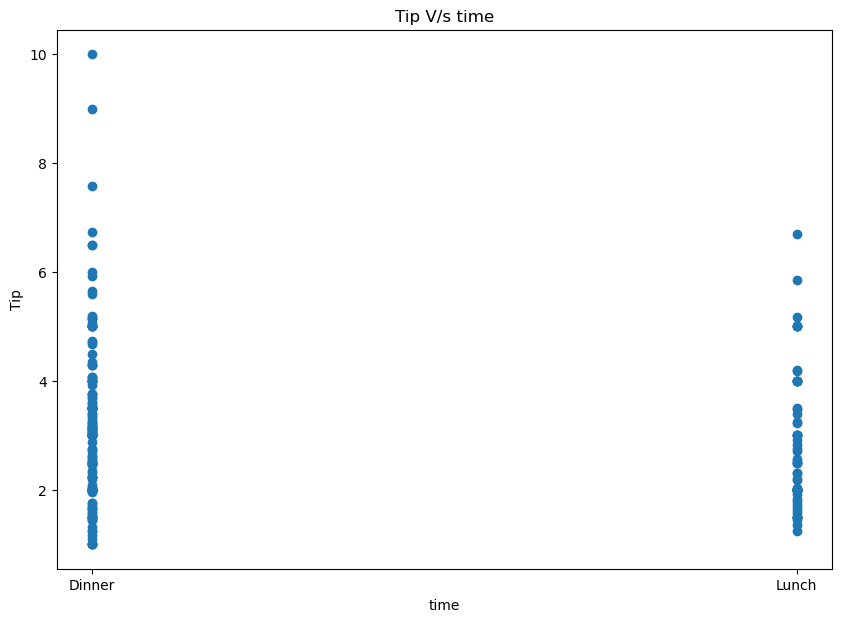

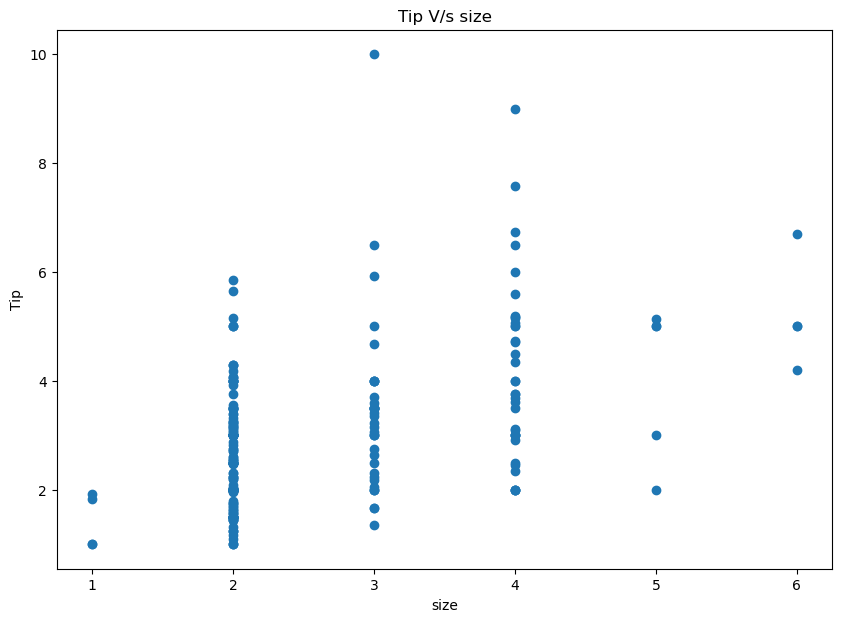

In [123]:
plt.figure(figsize=(10,7))
plt.scatter(df['total_bill'], df['tip'])
plt.title('Tip V/s Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.figure(figsize=(10,7))
plt.scatter(df['sex'], df['tip'])
plt.title('Tip V/s sex')
plt.xlabel('sex')
plt.ylabel('Tip')

plt.figure(figsize=(10,7))
plt.scatter(df['smoker'], df['tip'])
plt.title('Tip V/s smoker')
plt.xlabel('smoker')
plt.ylabel('Tip')

plt.figure(figsize=(10,7))
plt.scatter(df['day'], df['tip'])
plt.title('Tip V/s day')
plt.xlabel('day')
plt.ylabel('Tip')

plt.figure(figsize=(10,7))
plt.scatter(df['time'], df['tip'])
plt.title('Tip V/s time')
plt.xlabel('time')
plt.ylabel('Tip')

plt.figure(figsize=(10,7))
plt.scatter(df['size'], df['tip'])
plt.title('Tip V/s size')
plt.xlabel('size')
plt.ylabel('Tip')

df['smoker'].value_counts()
df['size'].value_counts()


Inferences 
1. There is correlation between Bill Amount and Tip indicating that as the bill increases tip increases
2. Men are more likely to tip as compared to female counterpart
3. Non_smokers Tip more
4. Highest tip was given on Saturdar
5. Dinners are tipped more as compared to Lunch
6. Family size of 2 tips most

In [126]:
df['time_new']=np.where(df['time']=='Dinner',1,0)

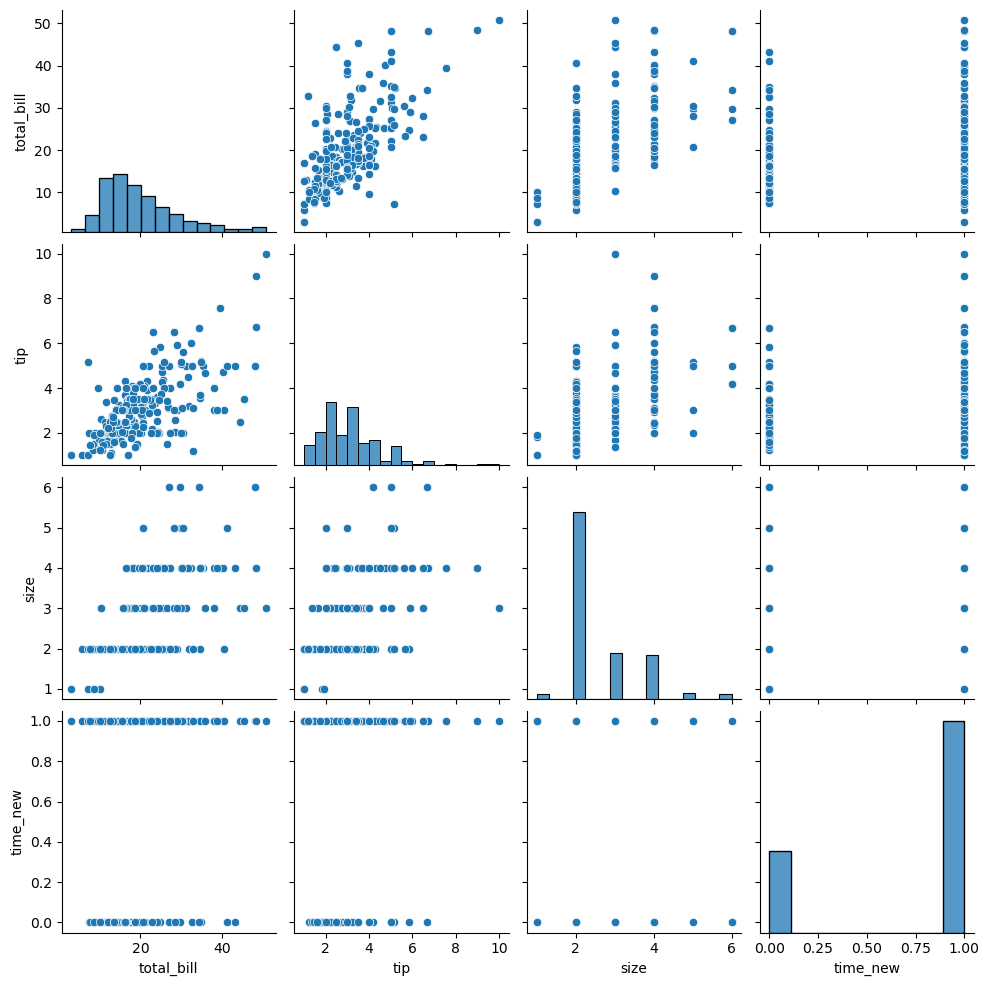

In [128]:

sns.pairplot(df)

<Axes: >

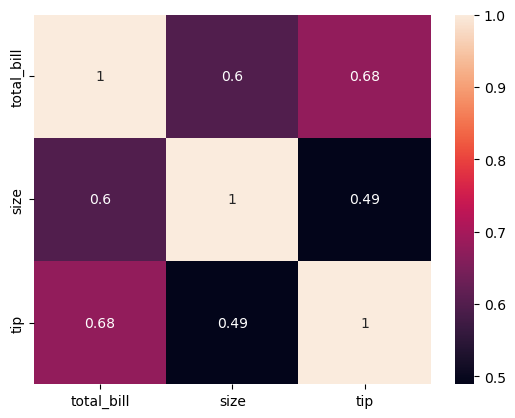

In [129]:
heatmap=df[['total_bill','size','tip']]
correlation=heatmap.corr()
sns.heatmap(correlation,annot=True)

In [130]:
new_df=df.drop('tip', axis=1)
new_df['sex'] = LabelEncoder().fit_transform(df['sex'])
new_df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
new_df['day'] = LabelEncoder().fit_transform(df['day'])
new_df['time'] = LabelEncoder().fit_transform(df['time'])

In [131]:
new_df.head()


,total_bill,sex,smoker,day,time,size,time_new
0,16.99,0,0,2,0,2,1
1,10.34,1,0,2,0,3,1
2,21.01,1,0,2,0,3,1
3,23.68,1,0,2,0,2,1
4,24.59,0,0,2,0,4,1


In [132]:
new_df2=df.tip

In [133]:
pip install statsmodels

In [134]:
import statsmodels.api as statsm
from statsmodels.stats.diagnostic import linear_rainbow

In [140]:
X = new_df
X = statsm.add_constant(X)
y = new_df2

In [141]:
model = statsm.OLS(y, X).fit()

In [142]:
test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


Here the p value is much greater than 0.05 implying that there is no significant break in the structure of dataset.
This implies that the relationship between dependent and independent is consistent over entire dataset

Text(0.5, 1.0, 'Tip V/s Day')

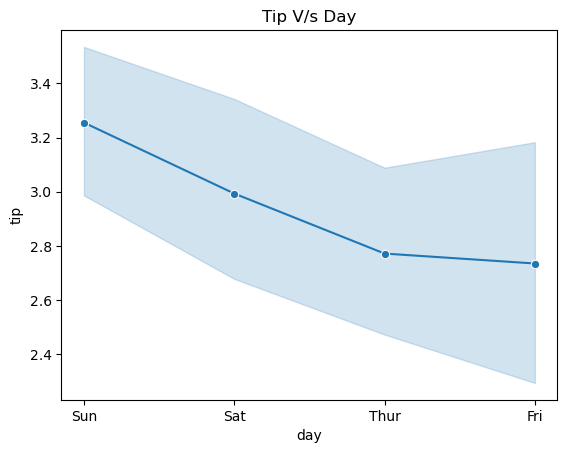

In [167]:
sns.lineplot(data=df, x='day', y='tip',marker="o")
plt.title("Tip V/s Day")

Text(0.5, 1.0, 'Toatl Bill V/s Day')

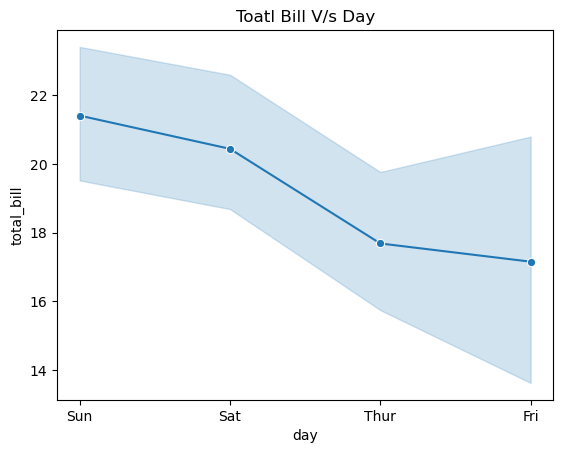

In [169]:
sns.lineplot(data=df, x='day', y='total_bill',marker="o")
plt.title("Toatl Bill V/s Day")

Here it is observed that mean maximum bill amount and mean maximum tip amount both are found on Sunday

In [181]:
dummies=pd.get_dummies(df)

In [255]:
x=dummies.drop('tip', axis=1)
y=dummies["tip"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [209]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [331]:
y_pred=linear_reg.predict(x_test)

In [221]:
mse= mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(r2_lr)
print(rmse)

0.8939195221609605
0.5545031052534934
0.9454731736865729


In [225]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [229]:
y_predlasso=lasso.predict(x_test)
mse_lasso= mean_squared_error(y_test, y_predlasso)
r2_lasso = r2_score(y_test, y_predlasso)
rmse_lasso=np.sqrt(mse_lasso)
print(mse_lasso)
print(r2_lasso)
print(rmse_lasso)

0.8230363971833976
0.5898286701221247
0.9072135345018821


In [233]:
forest=RandomForestRegressor(random_state=42)
forest.fit(x_train,y_train)
y_forest=forest.predict(x_test)
mse_forest= mean_squared_error(y_test, y_forest)
r2_forest = r2_score(y_test, y_forest)
rmse_forest=np.sqrt(mse_forest)
print(mse_forest)
print(r2_forest)
print(rmse_forest)




0.8520182820408165
0.5753851554792527
0.9230483638687718


In [237]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)
y_ridge=ridge.predict(x_test)
mse_ridge= mean_squared_error(y_test, y_ridge)
r2_ridge = r2_score(y_test, y_ridge)
rmse_ridge=np.sqrt(mse_ridge)
print(mse_ridge)
print(r2_ridge)
print(rmse_ridge)

0.8907606234838834
0.556077385170834
0.9438011567506598


In [265]:
tree=DecisionTreeRegressor(random_state=42)
tree.fit(x_train,y_train)
y_tree=tree.predict(x_test)
mse_tree= mean_squared_error(y_test, y_tree)
r2_tree = r2_score(y_test, y_tree)
rmse_tree=np.sqrt(mse_tree)
print(mse_tree)
print(r2_tree)
print(rmse_tree)

2.198853061224489
-0.09582818866212772
1.482853014032237


In [277]:
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
y_svr=svr.predict(x_test)
mse_svr= mean_squared_error(y_test, y_svr)
r2_svr = r2_score(y_test, y_svr)
rmse_svr=np.sqrt(mse_svr)
print(mse_svr)
print(r2_svr)
print(rmse_svr)

0.8674852356615845
0.567676989768112
0.9313888745639947


In [281]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_knn=knn.predict(x_test)
mse_knn= mean_squared_error(y_test, y_knn)
r2_knn = r2_score(y_test, y_knn)
rmse_knn=np.sqrt(mse_knn)
print(mse_knn)
print(r2_knn)
print(rmse_knn)

1.1731347755102037
0.4153524040446779
1.083113463820944


Lasso Regression Model is most accurate with r2 score of 0.5898286701221247 and rmse error of 0.9072135345018821

Residual Plots

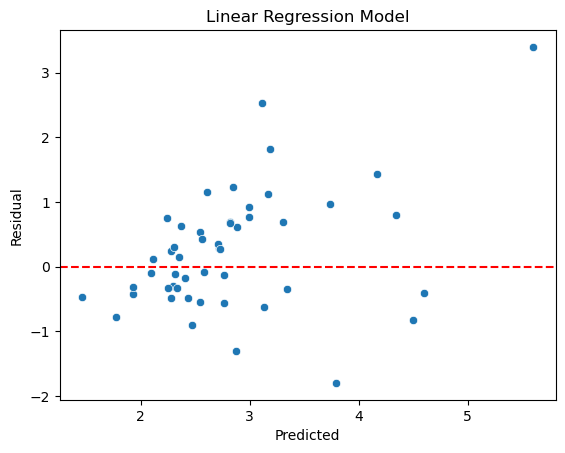

In [315]:
sns.scatterplot(x=y_pred, y=y_test-y_pred,)
plt.title("Linear Regression Model")
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')



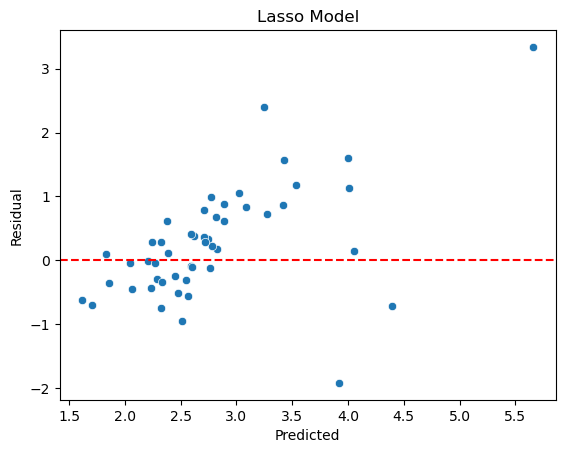

In [317]:
sns.scatterplot(x=y_predlasso, y=y_test-y_predlasso,)
plt.title("Lasso Model")
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')

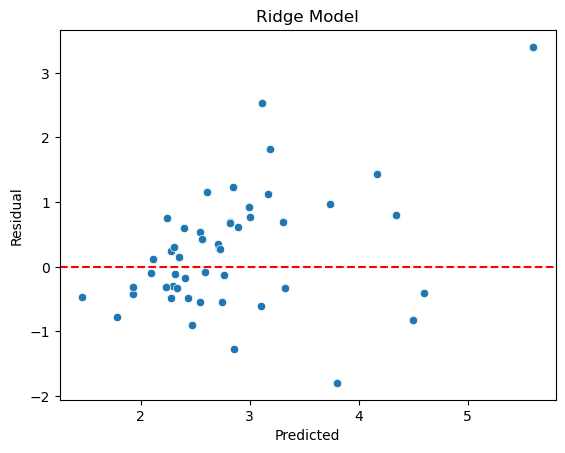

In [319]:
sns.scatterplot(x=y_ridge, y=y_test-y_ridge,)
plt.title("Ridge Model")
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')

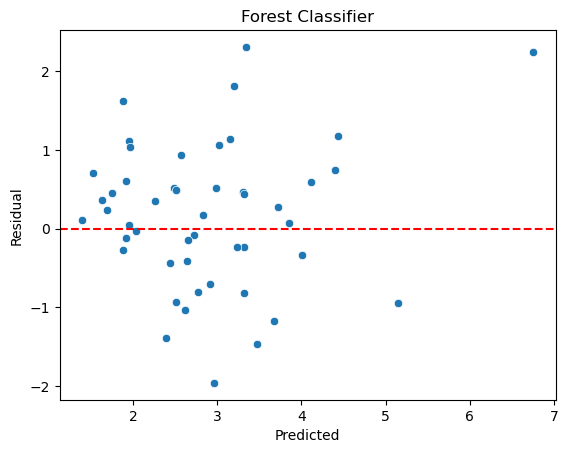

In [321]:
sns.scatterplot(x=y_forest, y=y_test-y_forest,)
plt.title("Forest Classifier")
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')

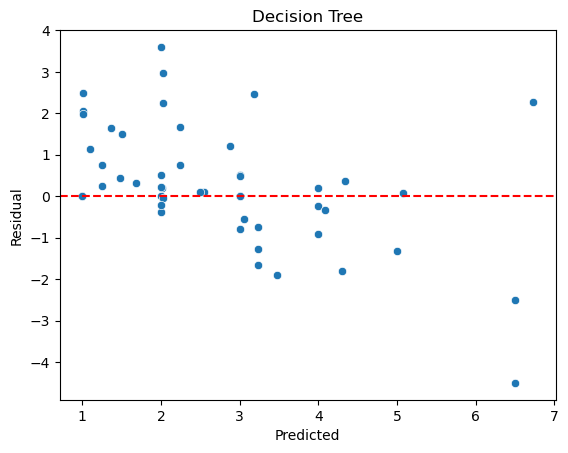

In [323]:
sns.scatterplot(x=y_tree, y=y_test-y_tree,)
plt.title("Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')

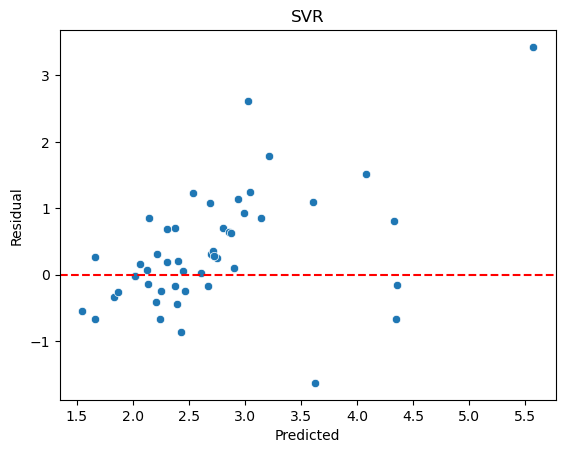

In [325]:
sns.scatterplot(x=y_svr, y=y_test-y_svr,)
plt.title("SVR")
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')

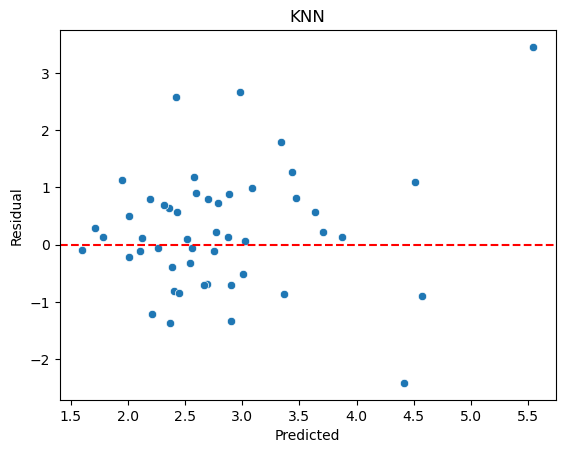

In [327]:
sns.scatterplot(x=y_knn, y=y_test-y_knn,)
plt.title("KNN")
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--')